## Seaborn学习笔记（Iris）

### 导入相关包及数据集

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置默认风格
sns.set(style="darkgrid")

# 读入数据
iris = pd.read_csv('iris.csv')

# 设置中文显示字体为黑体
sns.set(font='SimHei')

In [ ]:
# 主题

sns.set_style("whitegrid")  # 白色网格背景
sns.set_style("darkgrid")   # 灰色网格背景
sns.set_style("dark")       # 灰色背景
sns.set_style("white")      # 白色背景
sns.set_style("ticks")      # 四周加边框和刻度

### 查看数据基本信息

In [2]:
# 查看数据大小
iris.shape

(150, 5)

In [3]:
# 查看前十行数据
iris.head(10)

,花萼长度,花萼宽度,叶片长度,叶片宽度,品种
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# 查看数据描述
iris.describe()

,花萼长度,花萼宽度,叶片长度,叶片宽度
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 查看数据信息
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
花萼长度    150 non-null float64
花萼宽度    150 non-null float64
叶片长度    150 non-null float64
叶片宽度    150 non-null float64
品种      150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 散点图

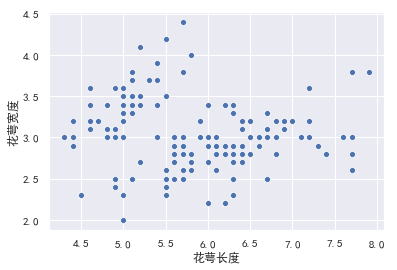

In [6]:
# 基础版
ax = sns.scatterplot(x='花萼长度', y='花萼宽度', data=iris)

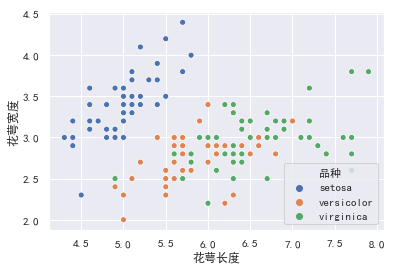

In [7]:
# 添加品种标识
ax = sns.scatterplot(x='花萼长度', y='花萼宽度', data=iris, hue='品种')

### 折线图

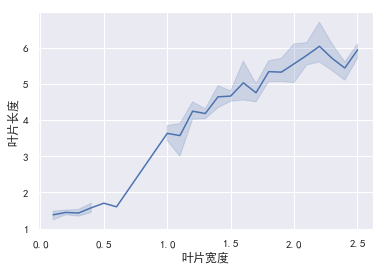

In [8]:
# 基础版
ax = sns.lineplot(x=iris['叶片宽度'], y=iris['叶片长度'])

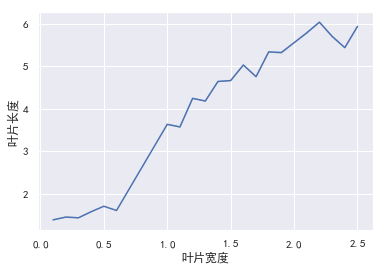

In [9]:
# 去掉置信区间
ax = sns.lineplot(x=iris['叶片宽度'], y=iris['叶片长度'], ci=0)

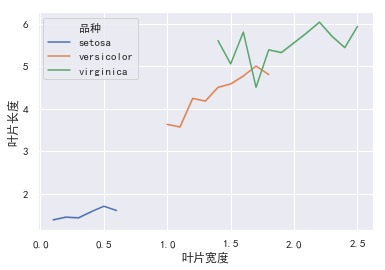

In [10]:
# 添加品种分类标识
ax = sns.lineplot(x=iris['叶片宽度'], y=iris['叶片长度'], ci=0, hue=iris['品种'])

### 柱状图

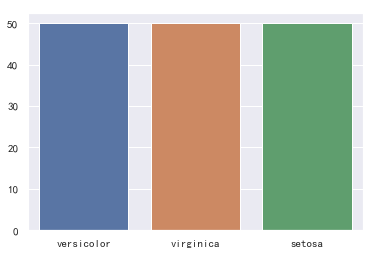

In [11]:
# 基础版
sns.barplot(x=iris['品种'].value_counts().index, y=iris['品种'].value_counts().values)

### 直方图

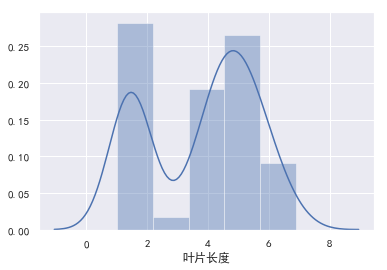

In [12]:
# 基础版
ax = sns.distplot(iris['叶片长度'])

### 箱线图

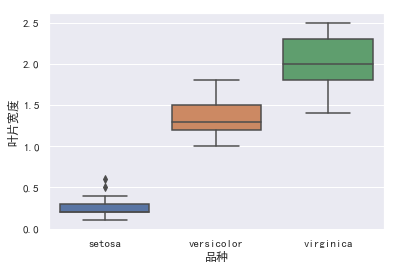

In [13]:
# 基础版
ax = sns.boxplot(x=iris['品种'], y=iris['叶片宽度'])

### 小提琴图

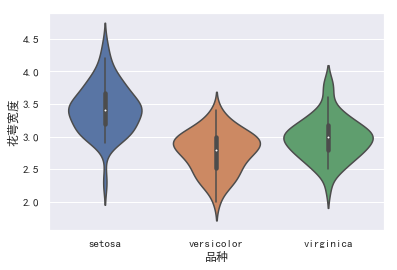

In [14]:
# 基础版
ax = sns.violinplot(x=iris['品种'], y=iris['花萼宽度'])

### 分布散点图

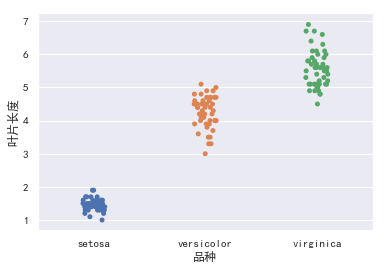

In [15]:
# 基础版
ax = sns.stripplot(x=iris['品种'], y=iris['叶片长度'])

### 分布密度散点图

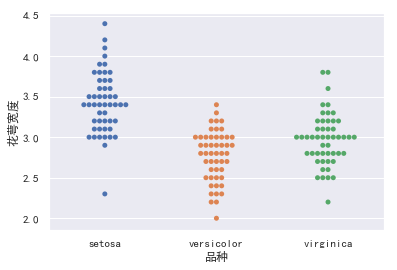

In [16]:
# 基础版
ax = sns.swarmplot(x=iris['品种'], y=iris['花萼宽度'])

### 核密度图

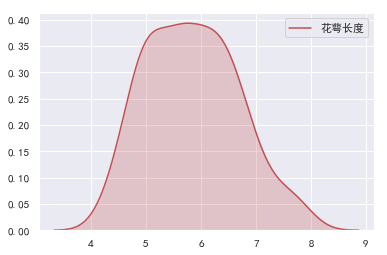

In [17]:
# 单变量核密度图
ax=sns.kdeplot(iris['花萼长度'],shade=True,shade_lowest=False,cbar=True,color='r')

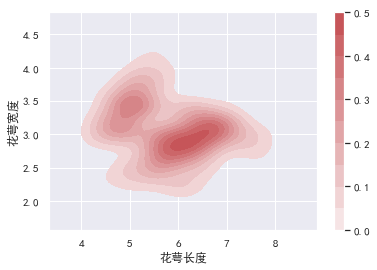

In [18]:
# 双变量核密度图
ax = sns.kdeplot(iris['花萼长度'], iris['花萼宽度'], shade=True, shade_lowest=False, cbar=True, color='r')

### 联合分布图

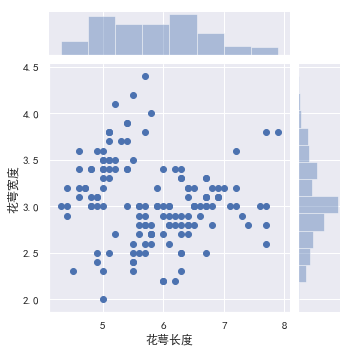

In [19]:
# 散点图 + 直方图
ax = sns.jointplot(x=iris['花萼长度'], y=iris['花萼宽度'], height=5)

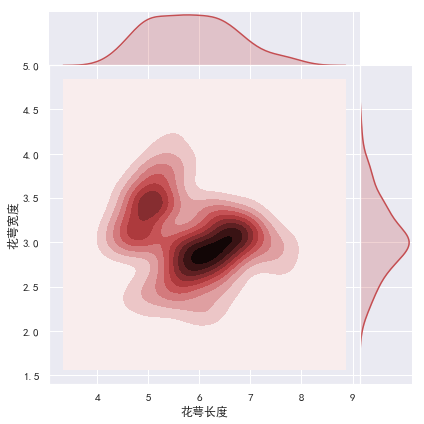

In [20]:
# 密度估计 + 分布图
g = sns.jointplot(x=iris['花萼长度'], y=iris['花萼宽度'],kind='kde', space=0,ratio=6 ,color="r")

### 叠加图

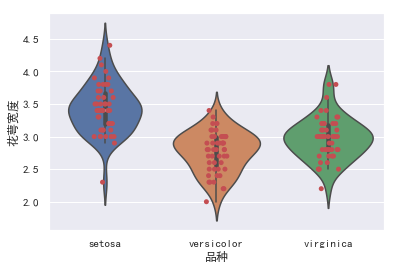

In [21]:
# 小提琴图 + 分布散点图
ax = sns.violinplot(x=iris['品种'], y=iris['花萼宽度'])
ax = sns.stripplot(x=iris['品种'], y=iris['花萼宽度'],color='r')

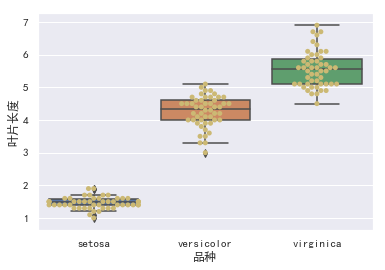

In [22]:
# 箱线图 + 分布密度散点图
ax = sns.boxplot(x=iris['品种'], y=iris['叶片长度'])
ax = sns.swarmplot(x=iris['品种'], y=iris['叶片长度'], color='y')

### 变量关系组图

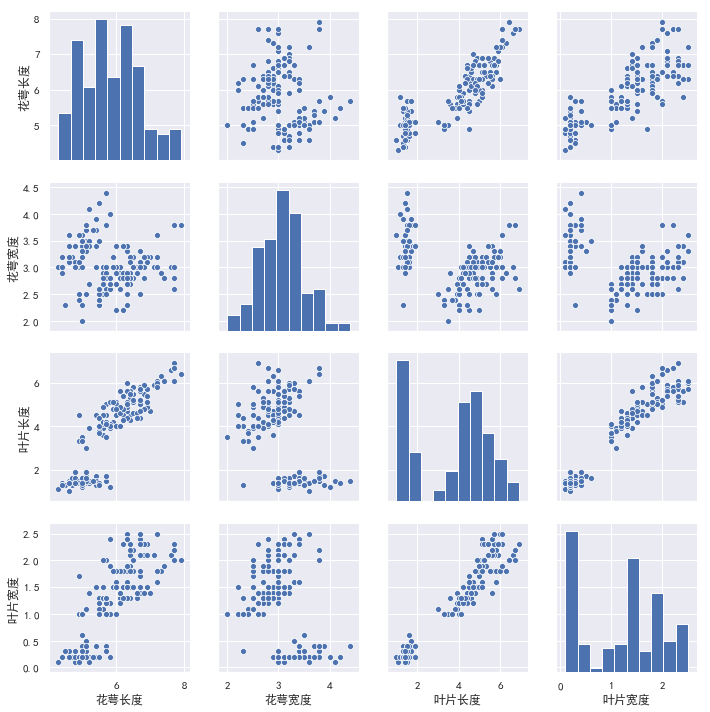

In [23]:
# 基础版
ax = sns.pairplot(iris)

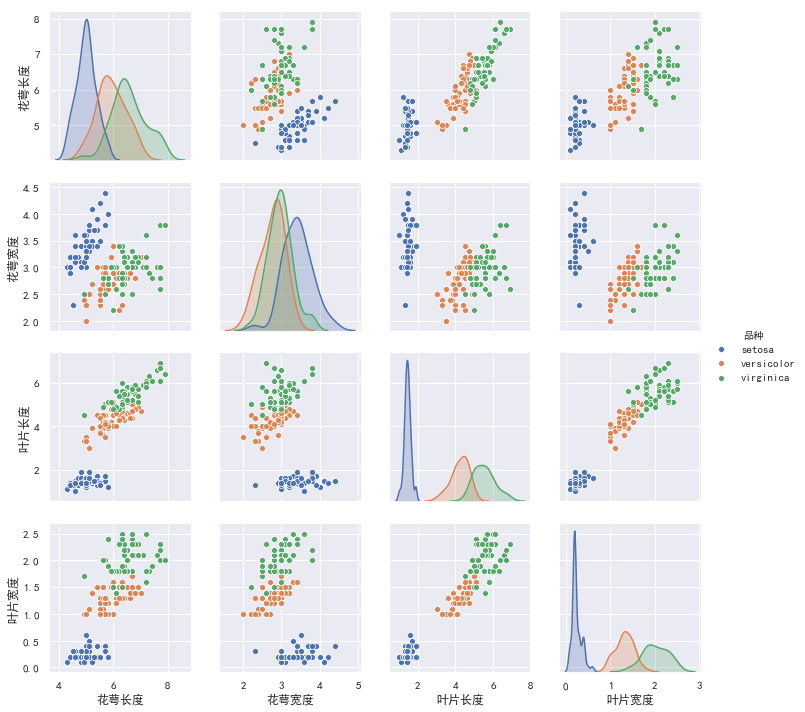

In [24]:
# 添加品种标识
ax = sns.pairplot(iris, hue='品种')

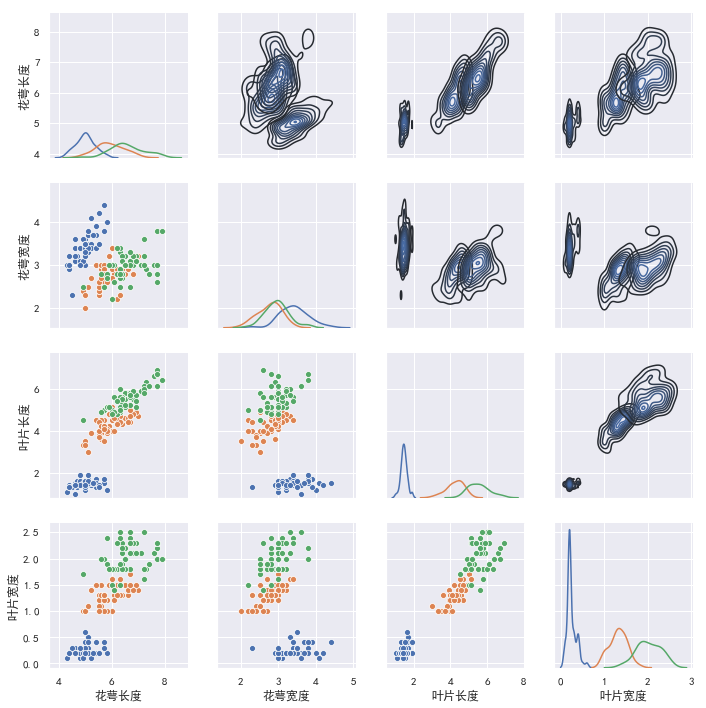

In [25]:
# PairGrid
ax = sns.PairGrid(iris,hue="品种")
ax.map_lower(sns.scatterplot)
ax.map_upper(sns.kdeplot,color='b')
ax.map_diag(sns.kdeplot)

### 热力图

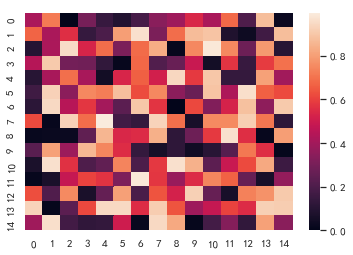

In [25]:
# 生成一组随机值
np.random.seed(1)    # 随机种子
x = np.random.rand(15, 15)

# 基础版
ax = sns.heatmap(x)

### 回归图

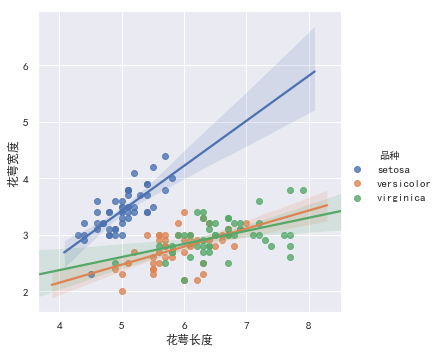

In [27]:
# lmplot
ax = sns.lmplot(x='花萼长度', y='花萼宽度', hue='品种', data=iris)

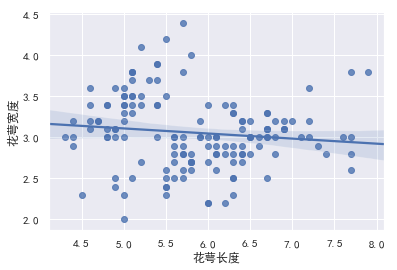

In [28]:
# regplot
ax = sns.regplot(x='花萼长度', y='花萼宽度',data=iris)